**Alzheimer**( Dementia )  **disease prediction**

using Cross-sectional & Longitudinal  MRI Datasets from OASIS

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute  import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Data Collection and Analysis**

In [ ]:
# loading the dataset to a Pandas DataFrame

cross_dataset = pd.read_csv('/content/oasis_cross-sectional.csv')
longitudinal_dataset = pd.read_csv('/content/oasis_longitudinal.csv')


In [ ]:
# printing first 5 rows
cross_dataset.head()



,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


removing all the rows with 'NULL' values in  CDR column ( as CDR is what we intend to predict)

-CDR : Clinical dementia rating , score ranges from 0 to 3 ( but in our dataset it's just 0,0.5,1)

    --CDR 0: Indicates no dementia. This means the individual has no cognitive impairment and functions normally.

    --CDR 0.5: Represents very mild dementia. At this stage, there might be subtle cognitive changes, but daily life activities are not significantly affected.

    --CDR 1: Indicates mild dementia. Cognitive deficits become more noticeable, impacting daily functioning.


In [ ]:
cross_dataset['CDR'].value_counts()

0.0    135
0.5     70
1.0     28
2.0      2
Name: CDR, dtype: int64

In [ ]:
longitudinal_dataset.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
longitudinal_dataset['CDR'].value_counts()

0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64

**Checking for null values**

In [ ]:
print(cross_dataset.isna().sum())
print("\n")
print(longitudinal_dataset.isna().sum())

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [ ]:
cross_dataset.dropna(subset=['CDR'],inplace=True)

In [ ]:
cross_dataset.drop(columns=['ID','Delay'],inplace=True)
longitudinal_dataset = longitudinal_dataset.rename(columns={'EDUC':'Educ'})
longitudinal_dataset.drop(columns=['Subject ID','MRI ID','Group','Visit','MR Delay'],inplace=True)

In [ ]:
data = pd.concat([cross_dataset,longitudinal_dataset])
data.head()

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


**Data measures - central tendency**

In [ ]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,608.000000,608.000000,570.00000,606.000000,608.000000,608.000000,608.00000,608.000000
mean,75.208882,10.184211,2.47193,27.234323,0.288651,1477.062500,0.73713,1.203597
std,9.865026,6.058388,1.12805,3.687980,0.377697,170.653795,0.04267,0.135091
min,33.000000,1.000000,1.00000,4.000000,0.000000,1106.000000,0.64400,0.876000
25%,70.000000,4.000000,2.00000,26.000000,0.000000,1352.500000,0.70400,1.118000
50%,76.000000,12.000000,2.00000,29.000000,0.000000,1460.000000,0.73600,1.202000
75%,82.000000,16.000000,3.00000,30.000000,0.500000,1569.000000,0.76625,1.297500
max,98.000000,23.000000,5.00000,30.000000,2.000000,2004.000000,0.84700,1.587000


**correlation analysis**

<ipython-input-36-171ade5bf97a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

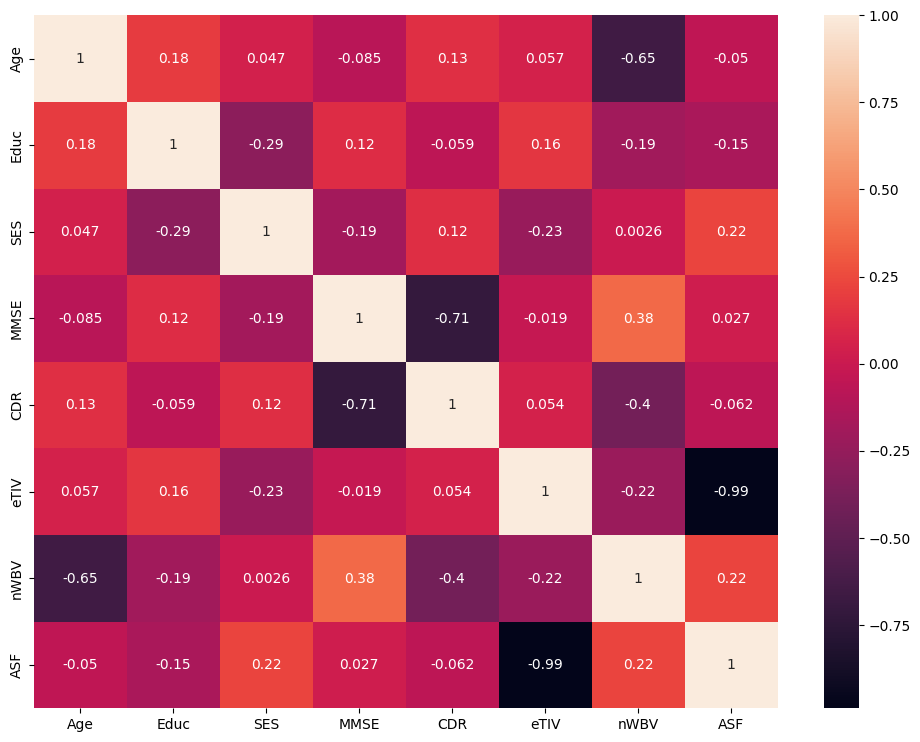

In [ ]:
cor = data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor, xticklabels=cor.columns.values,yticklabels=cor.columns.values, annot=True)

**checking for null values**

In [ ]:
data.isna().sum()


M/F      0
Hand     0
Age      0
Educ     0
SES     38
MMSE     2
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

**Imputing**  SES column missig values with median value

In [ ]:
imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

#fit
imputer.fit(data[['SES']])

#transform
data[['SES']] = imputer.fit_transform(data[['SES']])

# with median of that column
imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(data[['MMSE']])
data[['MMSE']] = imputer.fit_transform(data[['MMSE']])

In [ ]:
data

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...
368,M,R,82,16.0,1.0,28.0,0.5,1693,0.694,1.037
369,M,R,86,16.0,1.0,26.0,0.5,1688,0.675,1.040
370,F,R,61,13.0,2.0,30.0,0.0,1319,0.801,1.331
371,F,R,63,13.0,2.0,30.0,0.0,1327,0.796,1.323


**label encoding**
- Encoding the Target variable ( CDR ) using LabelEncoder.

In [ ]:
if 'CDR' not in data.columns:
    raise KeyError("The 'CDR' column does not exist in the data DataFrame.")

In [ ]:
# separate the data and Label
X = data.drop('CDR',axis=1)

LABEL BINARIZATION

In [ ]:
Y = data['CDR'].apply(lambda y_value: 1 if y_value >= 1 else 0)

In [ ]:
Y_train = pd.to_numeric(Y_train)

NameError: name 'Y_train' is not defined

In [ ]:
print(Y)

0      0
1      0
2      0
8      0
9      0
      ..
368    0
369    0
370    0
371    0
372    0
Name: CDR, Length: 608, dtype: int64


**Converting Categorical variables to Numerical**

In [ ]:
data

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...
368,M,R,82,16.0,1.0,28.0,0.5,1693,0.694,1.037
369,M,R,86,16.0,1.0,26.0,0.5,1688,0.675,1.040
370,F,R,61,13.0,2.0,30.0,0.0,1319,0.801,1.331
371,F,R,63,13.0,2.0,30.0,0.0,1327,0.796,1.323


**Training-Test split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(608,) (486,) (122,)


**Model Training:**

Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

ValueError: could not convert string to float: 'F'

**Model Evaluation**

Accuracy Score

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8852459016393442


**Building a Predictive System**

In [ ]:
input_data = (73 ,4.0 , 3.0 ,27.0 ,	1454 ,	0.708	, 1.207	, 1	, 0, 	1)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Mild Dementia')
else:
  print('NO dementia')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


AttributeError: 'RandomForestClassifier' object has no attribute 'n_classes_'